# Lista 6 - Física Computacional I
Aluna: Ylana Karolina Santos Lopes

In [49]:
import matplotlib.pyplot as plt
from numpy import linspace, sqrt, exp, pi
from gaussxw import gaussxw

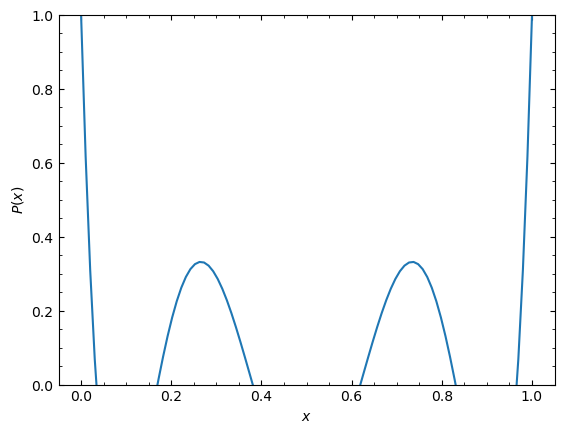

In [2]:
# Problema 1
# a)
def p(x):
    return 924*(x**6) - 2772*(x**5) + 3150*(x**4) - 1680*(x**3) + 420*(x**2) - 42*x + 1 

x = linspace(0,1,100)
plt.plot(x,p(x))
plt.xlabel("$x$")
plt.ylabel("$P(x)$")
plt.ylim(0,1) ## limite para facilitar a inspeção

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.minorticks_on()
plt.show()

As raízes do polinômio serão dadas pelos pontos em que a função cruza o zero (eixo x) e como cada espaço da escala equivale a 0.05 unidades, aproximamos as raízes a:

$x_{1} = 0.03$ ,  $x_{2} = 0.17$ ,$x_{3} = 0.37$ ,$x_{4} = 0.62$ ,$x_{5} = 0.83$ ,$x_{6} = 0.96$ .


In [3]:
# b)
def dp(x):
    return 5544*(x**5) - 13860*(x**4) + 12600*(x**3) - 5040*(x**2) + 840*x - 42

x_vec = [0, 0.15, 0.3, 0.6, 0.8, 0.9]
erro = 1
eps = 1.0e-10
count = 0

for x in x_vec: 
    erro = 1
    while (erro>eps):
        xold = x
        x = x - p(x)/dp(x)
        erro = abs(x-xold)
        count+=1
    print(x)

## valores calculados condizem com o mostrado graficamente

0.03376524289842398
0.16939530676686787
0.38069040695840045
0.619309593041593
0.8306046932331476
0.9662347571015693


#### Problema 2
a)

Para mostrar que:
$$\frac{GM}{r^2} - \frac{Gm}{(R - r)^2}= w^2r$$

Partimos das forças gravitacionais experienciadas pelo satélite devido a Terra e a Lua pela fórmula:

$$  \vec{F_{g}} = \frac{GMm}{r^2}  $$

Em que $r$ é a distancia entre o satélite o corpo (de acordo com a figura $r$ para a Terra e $(R-r)$ para a Lua). Como o satélite está em equilibrio a sua força centrípeta tem que ser igual a soma vetorial das gravitacionais:

$$  \vec{F_{cp}} = m_{sat}w^2r $$
$$ \vec{F_{cp}} = \vec{F_{Ts}} + \vec{F_{Ls}}    $$

Substituindo, e levando em conta o sentido das forças, chegamos na equação inicial depois de dividir tudo pela massa do satélite.

$$\frac{GM_{T}m_{sat}}{r^2} - \frac{Gm_{L}m_{sat}}{(R - r)^2}= w^2rm_{sat}$$

Resultando em:

$$\frac{GM_{T}}{r^2} - \frac{Gm_{L}}{(R - r)^2}= w^2r$$.


In [59]:
# b)
### constantes ###
G = 6.674e-11       
M = 5.974e24 
m = 7.348e22
R = 3.844e8
w = 2.662e-6 


In [73]:
# def f(r):
#     return ((r**5)*(w**2)) - (2*w*(r**4)*R) + ((r**3)*(R**2)*(w**2)) + (G*m*(r**2)) - (G*M(r**2)) + (2*G*M*R*r) - (G*M*(R**2))

# def df(r):
#     return (5*(r**4)*(w**2)) - (8*w*(r**3)*R) + (3*(r**2)*(R**2)*(w**2)) + (2*G*m*r) - (2*G*M*r) + (2*G*M*R)


## TypeError: 'float' object is not callable -> Não consegui resolver esse erro, então reescrevi de outra forma que foi a
## única que rodou.


In [77]:
def f(r):
    val = (R-r)**2
    return r**5 - G*M*val/(w**2) + G*m*(r**2)/(w**2) - 2*R*(r**4) + (R**2)*(r**3)

def df(r):
    return 5*r**4 - (G*M*(2*r-2*R))/(w**2) + 2*G*m*r/(w**2) - 8*R*(r**3) + 3*(R**2)*(r**2)

In [76]:
## Escolhi o método de Newton
r = 1.5e8 # metade da distancia entre a terra e a lua
erro = 1
eps = 1e-4
while (erro>eps):   
    r_old = r
    r = r - (f(r)/df(r))
    erro = abs(r-r_old)

print(r)

326045071.66535527


In [78]:
## Problema 3
### Constantes ###
h = 6.62607015e-34
c = 299792458
Kb = 1.380649e-23  

lb1 = 390e-9  ## lambda 1 e 2
lb2 = 750e-9

## função da quadratura gaussiana importada do arquivo gaussxw.py


In [79]:
#a)
def v(x):
    return (x**3)/(exp(x) - 1)

def n(T):
    n = 100
    b = (h*c)/(lb1*Kb*T)
    a = (h*c)/(lb2*Kb*T)
    y, w = gaussxw(n)
    
    x = (((b-a))*y + (b+a))/2
    wl = ((b-a)/2)*w
    
    soma = 0
    for k in range(n):
        soma += wl[k]*v(x[k])
    eff = soma*15/(pi**4)
    return eff

Text(0.5, 1.0, 'Eficiência x Temperatura')

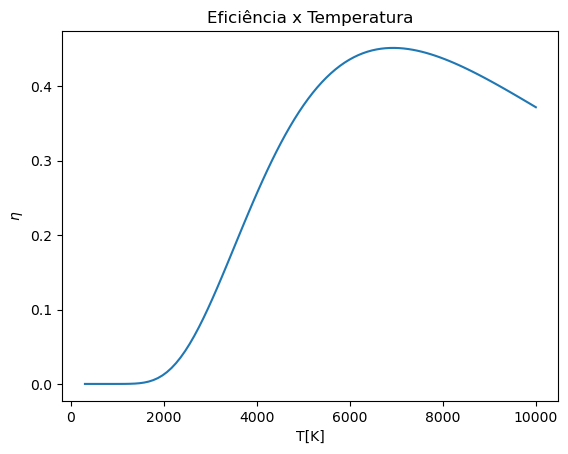

In [80]:
T = linspace(300, 10000, 100)
vec = []

for i in range(0, 100):
   vec.append(n(T[i]))
    
plt.plot(T, vec)
plt.xlabel("T[K]")
plt.ylabel("$\eta$")
plt.title("Eficiência x Temperatura")

## a temperatura máxima é na faixa de 6500-7000K

In [57]:
#b)
def sec_aurea(f, a, b, tol=1):
    phi = (1 + sqrt(5)) / 2
    c = b - (b - a) / phi
    d = a + (b - a) / phi
    while abs(b - a) > tol:
        if f(c) > f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / phi
        d = a + (b - a) / phi
    return (b + a) / 2


a = 300  
b = 10000  
t_max = sec_aurea(n, a, b, tol=1)

print(t_max)



6928.506344246048


##### c) 

Não é prático, pois a temperatura de fusão do tungstênio (3695 K) é bem abaixo da temperatura máxima de lâmpada (cerca de 6928 K), ou seja, o metal estaria derretido a esse ponto.